In [26]:
import numpy as np
import pandas as pd


In [27]:
df= pd.read_csv("uae_real_estate_2024.csv")

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [29]:
df.head()

,title,displayAddress,bathrooms,bedrooms,addedOn,type,price,verified,priceDuration,sizeMin,furnishing,description
0,Great ROI I High Floor I Creek View,"Binghatti Canal, Business Bay, Dubai",3,2,2024-08-14T12:02:53Z,Residential for Sale,2500000,True,sell,1323 sqft,NO,MNA Properties is delighted to offer this apar...
1,Full Sea View | Beach Life | Brand New Residence,"La Vie, Jumeirah Beach Residence, Dubai",3,2,2024-08-13T05:45:16Z,Residential for Sale,7200000,True,sell,1410 sqft,YES,"Apartment for sale in La Vie, Jumeirah Beach R..."
2,Green Belt | Corner Unit | Spacious Plot,"La Rosa 6, Villanova, Dubai Land, Dubai",3,4,2024-08-14T06:24:28Z,Residential for Sale,3600000,True,sell,2324 sqft,NO,Treo Homes is very pleased to be bringing to t...
3,2BR+Study | Near Pool and Park | Private,"Springs 15, The Springs, Dubai",3,2,2024-08-15T06:07:22Z,Residential for Sale,2999999,True,sell,1647 sqft,NO,2 Bedrooms + Study | Near Pool &amp; Park | Pr...
4,Vacant | Well Maintained | Area Expert,"Noor Townhouses, Town Square, Dubai",3,3,2024-08-09T08:28:59Z,Residential for Sale,2449999,True,sell,2105 sqft,NO,-Type 1\n-3 Bed+Maid\n-Close To Amenities\n-BU...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5058 entries, 0 to 5057
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           5058 non-null   object
 1   displayAddress  5058 non-null   object
 2   bathrooms       4938 non-null   object
 3   bedrooms        4935 non-null   object
 4   addedOn         5058 non-null   object
 5   type            5058 non-null   object
 6   price           5058 non-null   int64 
 7   verified        5058 non-null   bool  
 8   priceDuration   5058 non-null   object
 9   sizeMin         5058 non-null   object
 10  furnishing      5056 non-null   object
 11  description     5057 non-null   object
dtypes: bool(1), int64(1), object(10)
memory usage: 439.7+ KB


In [31]:
df.shape

(5058, 12)

In [32]:
df.duplicated().sum()

np.int64(0)

In [33]:
df.isnull().sum()

,0
title,0
displayAddress,0
bathrooms,120
bedrooms,123
addedOn,0
type,0
price,0
verified,0
priceDuration,0
sizeMin,0


In [34]:

df.drop(columns=['title', 'displayAddress', 'addedOn', 'description'], inplace=True)
df['bathrooms'] = df['bathrooms'].apply(lambda x: 0 if x == 'none' else (7 if x == '7+' else float(x)))
df['bedrooms'] = df['bedrooms'].apply(lambda x: 0 if x == 'studio' else (7 if x == '7+' else float(x)))
df['furnishing'] = df['furnishing'].map({'NO': 0, 'YES': 1, 'PARTLY': 2})
df['sizeMin'] = df['sizeMin'].str.replace(' sqft', '', regex=False).astype(float)
df['verified'] = df['verified'].astype(int)
df.drop(columns='priceDuration', inplace=True)
df['furnishing'] = df['furnishing'].fillna(0)

In [35]:

df['bedrooms_per_bathroom'] = df['bedrooms'] / (df['bathrooms'] + 1e-8)
df['price_per_sqft'] = df['price'] / (df['sizeMin'] + 1e-8)  # Avoid division by zero

# Define feature columns
numerical_features = ['bathrooms', 'bedrooms', 'sizeMin', 'verified', 'furnishing', 'bedrooms_per_bathroom', 'price_per_sqft']

def remove_outliers(df, columns, factor=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = remove_outliers(df, numerical_features)


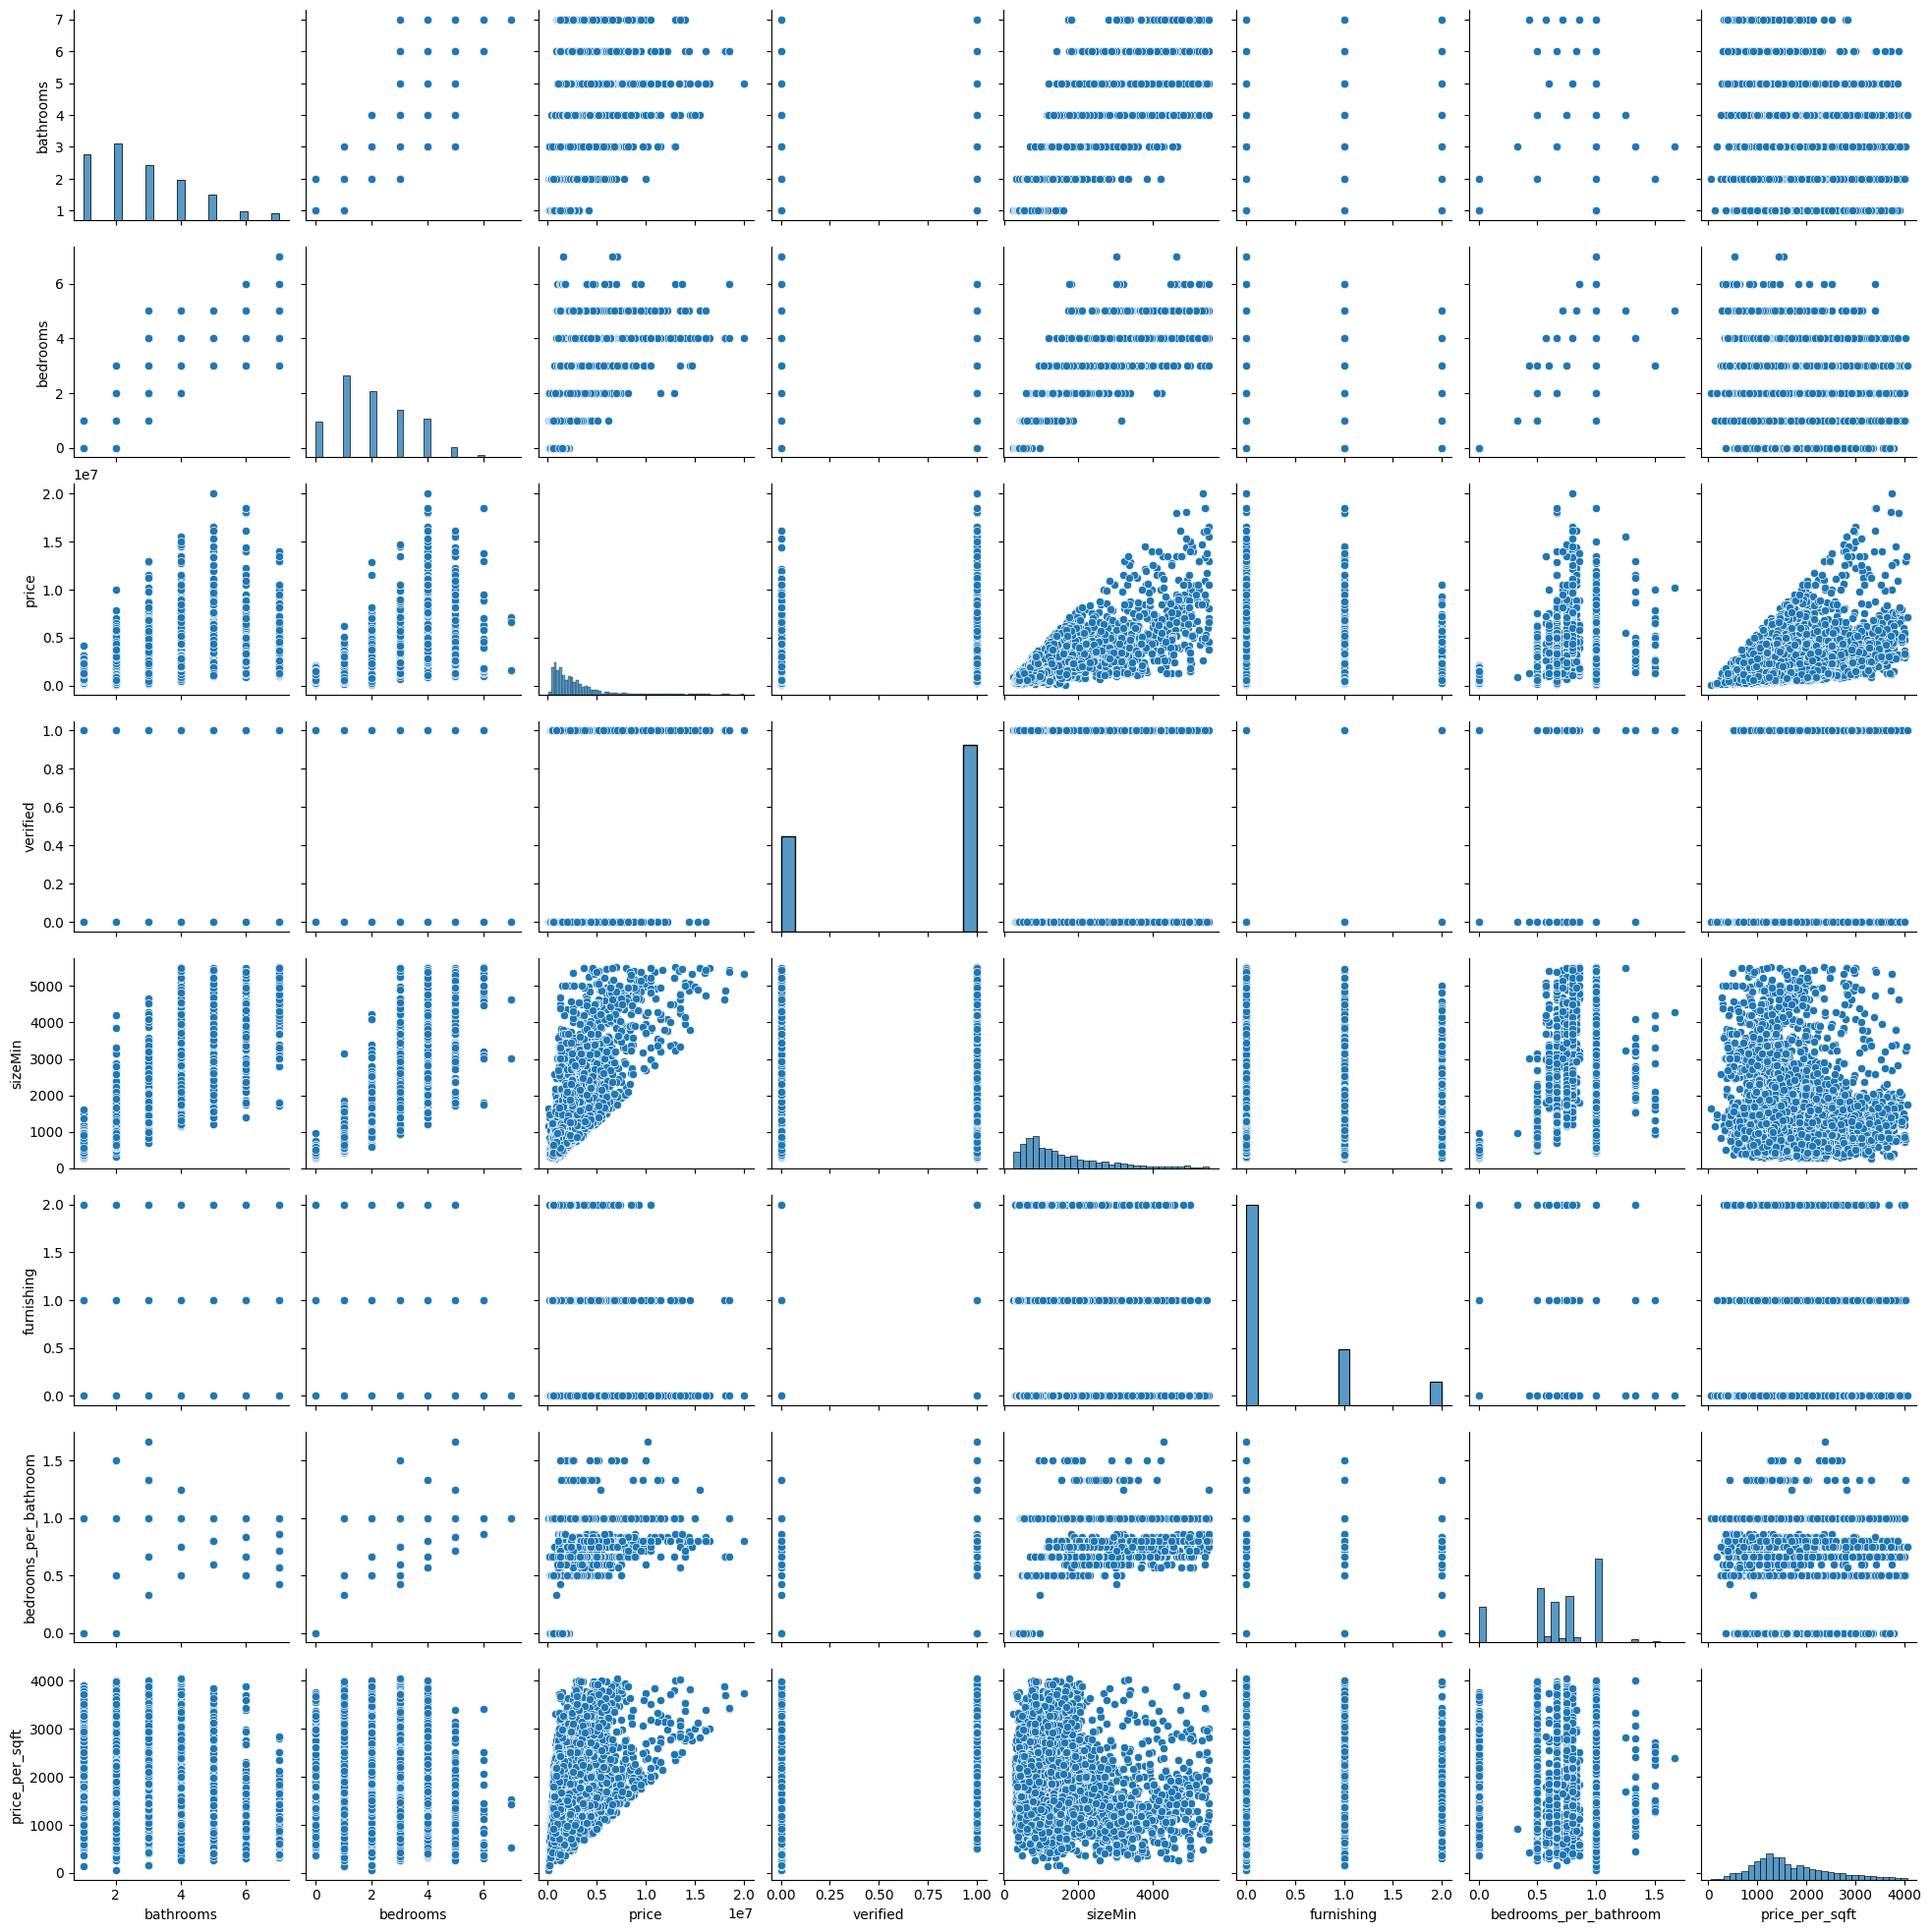

In [36]:
sns.pairplot(df)
plt.show()

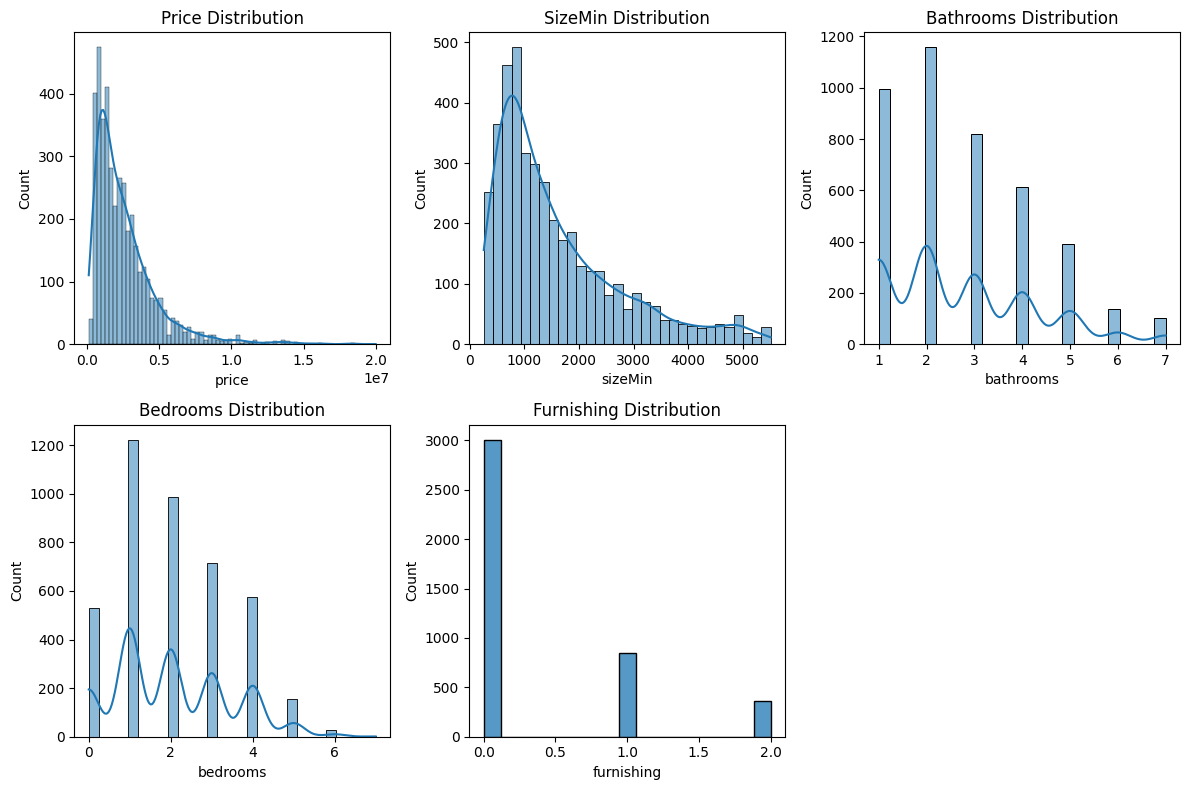

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions
plt.figure(figsize=(12, 8))

# Distribution of 'price'
plt.subplot(2, 3, 1)
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')

# Distribution of 'sizeMin'
plt.subplot(2, 3, 2)
sns.histplot(df['sizeMin'], kde=True)
plt.title('SizeMin Distribution')

# Distribution of 'bathrooms'
plt.subplot(2, 3, 3)
sns.histplot(df['bathrooms'], kde=True)
plt.title('Bathrooms Distribution')

# Distribution of 'bedrooms'
plt.subplot(2, 3, 4)
sns.histplot(df['bedrooms'], kde=True)
plt.title('Bedrooms Distribution')

# Distribution of 'furnishing'
plt.subplot(2, 3, 5)
sns.histplot(df['furnishing'], kde=False)
plt.title('Furnishing Distribution')

plt.tight_layout()
plt.show()


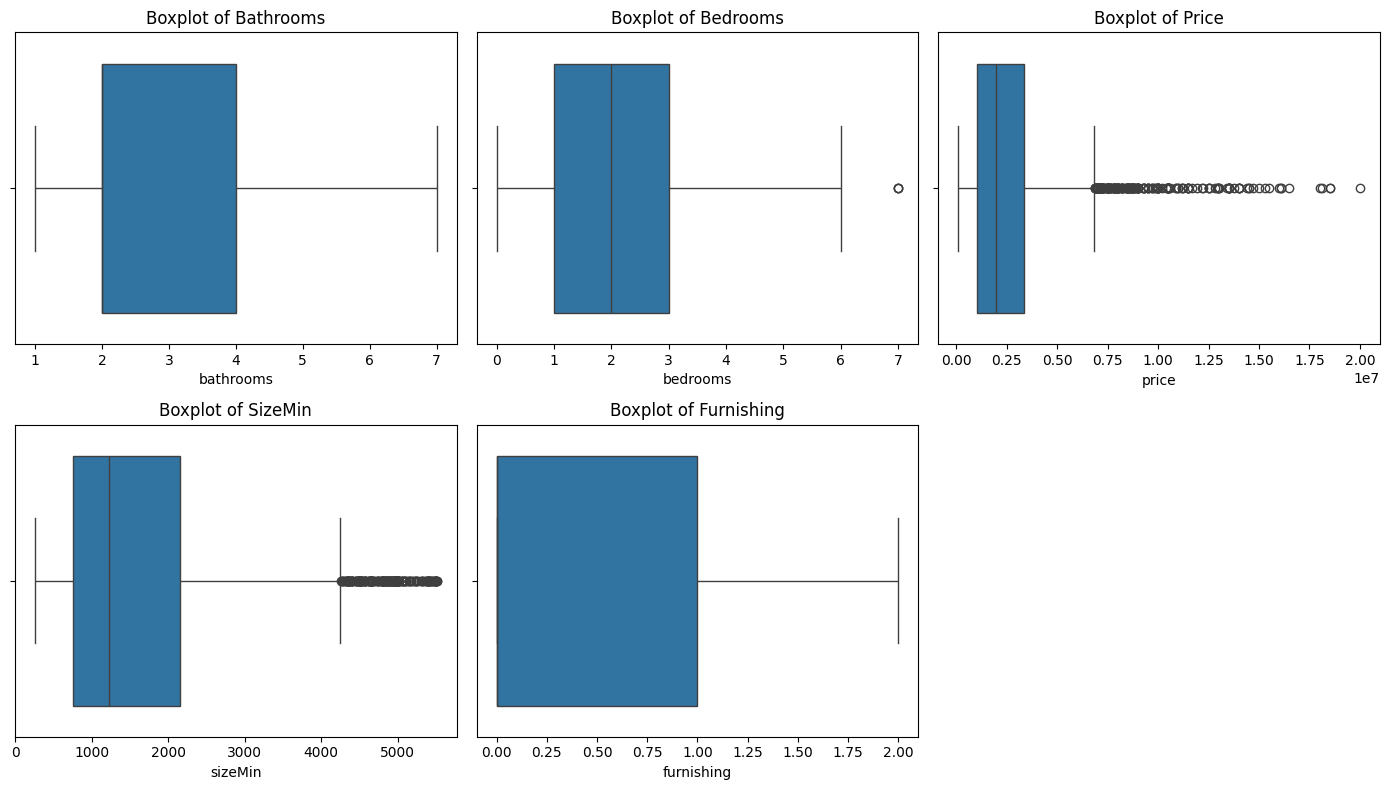

In [38]:

# Plot boxplots for each feature
plt.figure(figsize=(14, 8))

# Boxplot for 'bathrooms'
plt.subplot(2, 3, 1)
sns.boxplot(x=df['bathrooms'])
plt.title('Boxplot of Bathrooms')

# Boxplot for 'bedrooms'
plt.subplot(2, 3, 2)
sns.boxplot(x=df['bedrooms'])
plt.title('Boxplot of Bedrooms')

# Boxplot for 'price'
plt.subplot(2, 3, 3)
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')

# Boxplot for 'sizeMin'
plt.subplot(2, 3, 4)
sns.boxplot(x=df['sizeMin'])
plt.title('Boxplot of SizeMin')

# Boxplot for 'furnishing'
plt.subplot(2, 3, 5)
sns.boxplot(x=df['furnishing'])
plt.title('Boxplot of Furnishing')

plt.tight_layout()
plt.show()


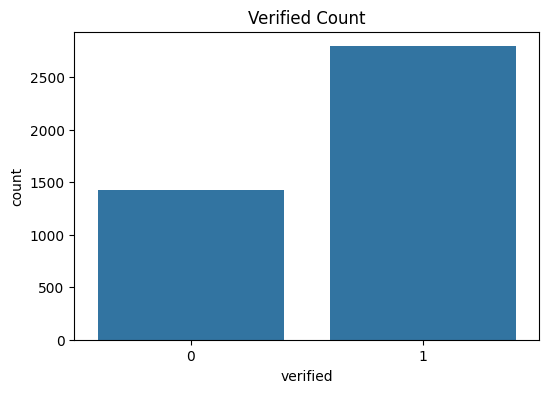

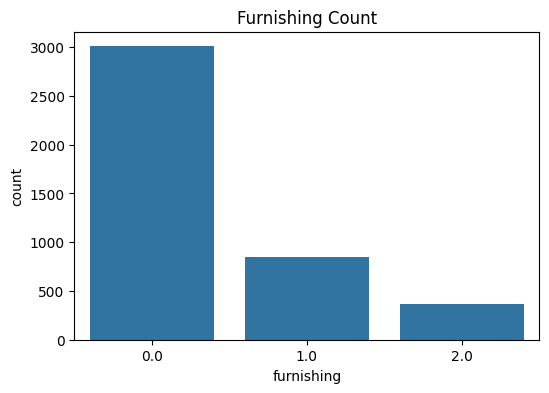

In [39]:
# Count plot for 'verified'
plt.figure(figsize=(6, 4))
sns.countplot(x='verified', data=df)
plt.title('Verified Count')
plt.show()

# Count plot for 'furnishing'
plt.figure(figsize=(6, 4))
sns.countplot(x='furnishing', data=df)
plt.title('Furnishing Count')
plt.show()


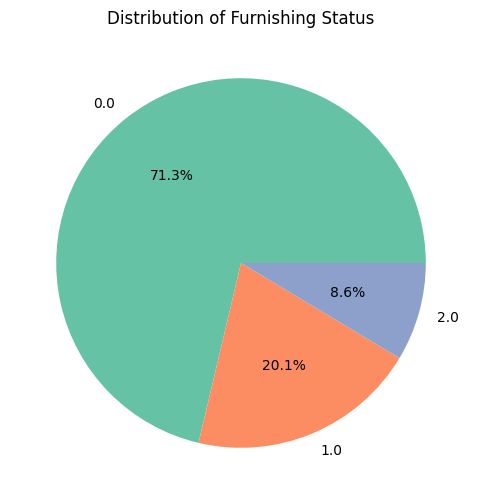

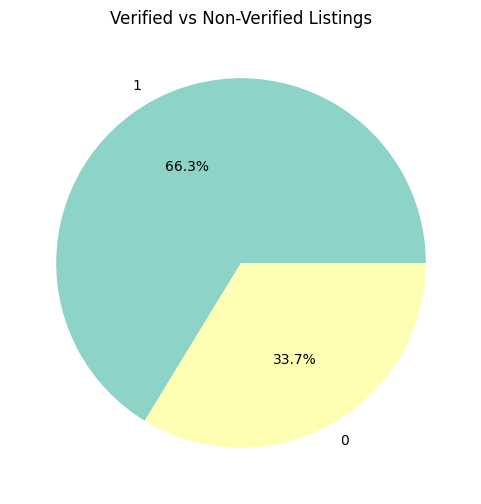

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Pie Chart for Furnishing Status
plt.figure(figsize=(6, 6))
df['furnishing'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Distribution of Furnishing Status')
plt.ylabel('')
plt.show()

# Pie Chart for Verified vs Non-Verified Listings
plt.figure(figsize=(6, 6))
df['verified'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Verified vs Non-Verified Listings')
plt.ylabel('')
plt.show()


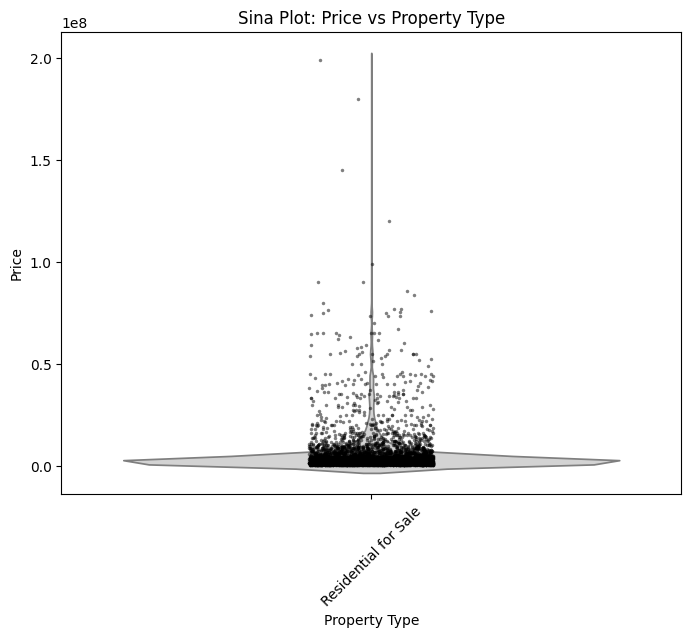

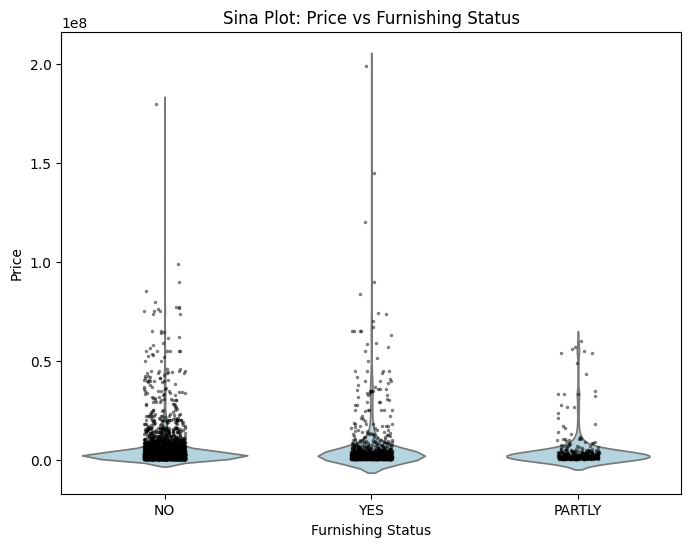

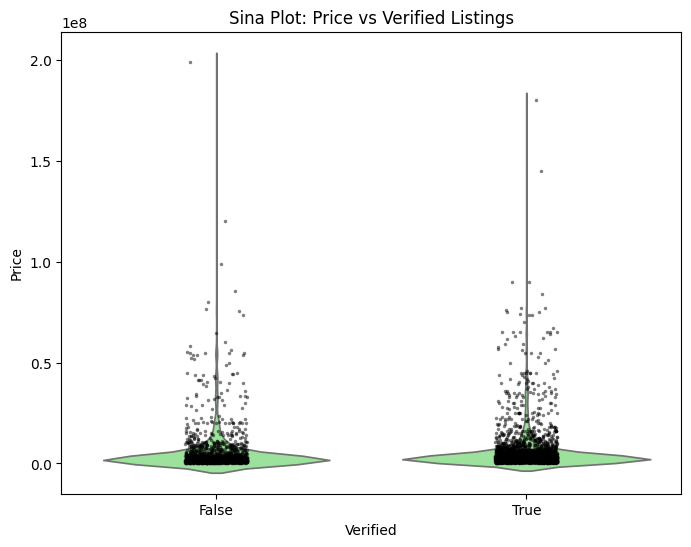

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "uae_real_estate_2024.csv"
df = pd.read_csv(file_path)

# Sina plot for Price vs Property Type
plt.figure(figsize=(8, 6))
sns.violinplot(x='type', y='price', data=df, inner=None, color="lightgray")
sns.stripplot(x='type', y='price', data=df, jitter=True, size=2.5, color="black", alpha=0.5)
plt.title('Sina Plot: Price vs Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Sina plot for Price vs Furnishing Status
plt.figure(figsize=(8, 6))
sns.violinplot(x='furnishing', y='price', data=df, inner=None, color="lightblue")
sns.stripplot(x='furnishing', y='price', data=df, jitter=True, size=2.5, color="black", alpha=0.5)
plt.title('Sina Plot: Price vs Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

# Sina plot for Price vs Verified Listings
plt.figure(figsize=(8, 6))
sns.violinplot(x='verified', y='price', data=df, inner=None, color="lightgreen")
sns.stripplot(x='verified', y='price', data=df, jitter=True, size=2.5, color="black", alpha=0.5)
plt.title('Sina Plot: Price vs Verified Listings')
plt.xlabel('Verified')
plt.ylabel('Price')
plt.show()

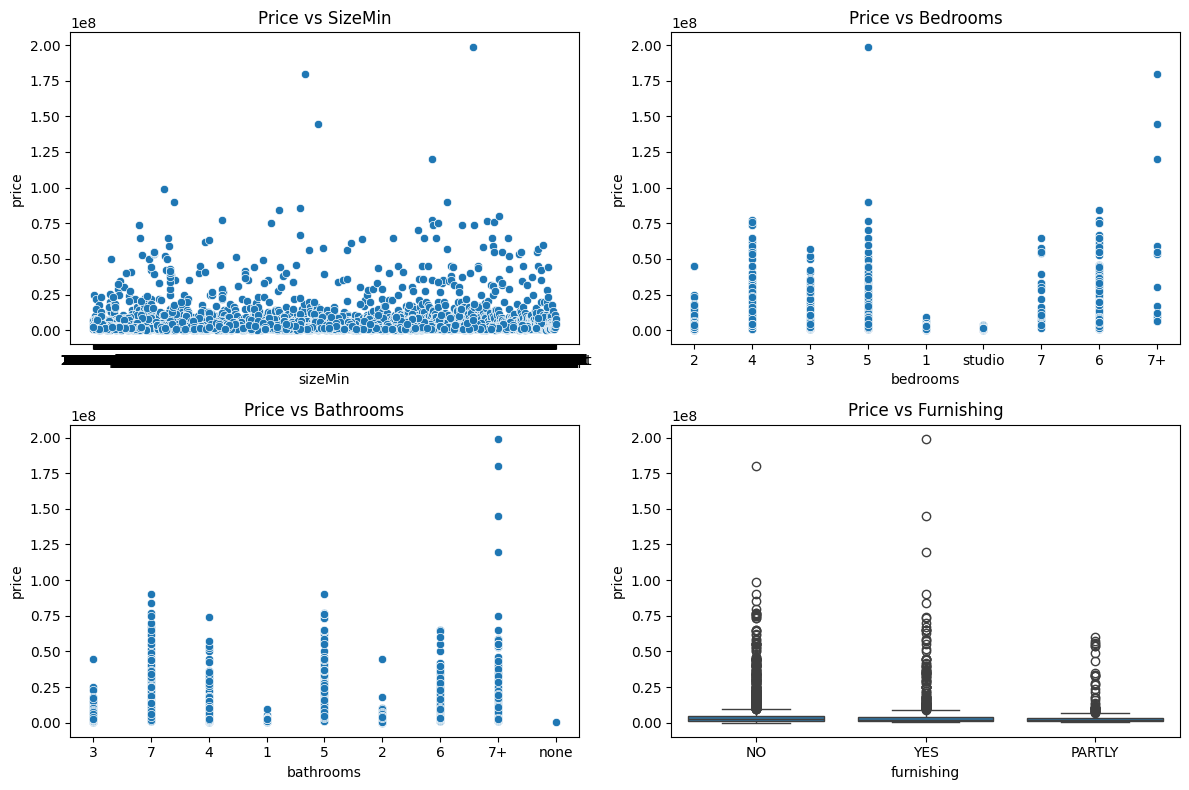

In [42]:
# Scatter plots
plt.figure(figsize=(12, 8))

# Price vs. SizeMin
plt.subplot(2, 2, 1)
sns.scatterplot(x='sizeMin', y='price', data=df)
plt.title('Price vs SizeMin')

# Price vs. Bedrooms
plt.subplot(2, 2, 2)
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('Price vs Bedrooms')

# Price vs. Bathrooms
plt.subplot(2, 2, 3)
sns.scatterplot(x='bathrooms', y='price', data=df)
plt.title('Price vs Bathrooms')

# Price vs. Furnishing
plt.subplot(2, 2, 4)
sns.boxplot(x='furnishing', y='price', data=df)
plt.title('Price vs Furnishing')

plt.tight_layout()
plt.show()


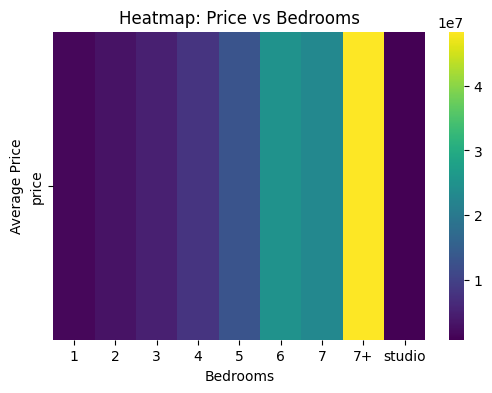

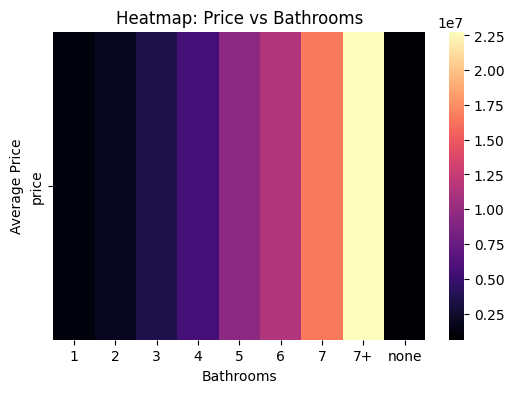

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "uae_real_estate_2024.csv"
df = pd.read_csv(file_path)

# Generate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plotting heatmap for Price vs Bedrooms
plt.figure(figsize=(6, 4))
sns.heatmap(df.pivot_table(index='bedrooms', values='price', aggfunc='mean').T, cmap='viridis')
plt.title('Heatmap: Price vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Average Price')
plt.show()

# Plotting heatmap for Price vs Bathrooms
plt.figure(figsize=(6, 4))
sns.heatmap(df.pivot_table(index='bathrooms', values='price', aggfunc='mean').T, cmap='magma')
plt.title('Heatmap: Price vs Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Average Price')
plt.show()



In [44]:
from sklearn.preprocessing import StandardScaler

In [52]:
# Only keep numeric columns
x = df.select_dtypes(include=['number'])  # select only numeric features
y = df['price']


In [53]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
# Create a pipeline
pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    RandomForestRegressor(n_estimators=100, random_state=42)
)

# Fit the model
pipeline.fit(X_train, y_train)



Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

Mean Squared Error: 2227749335.3973417
R^2 Score: 0.9999781062026484
Cross-validation MSE: 589119708292.1475


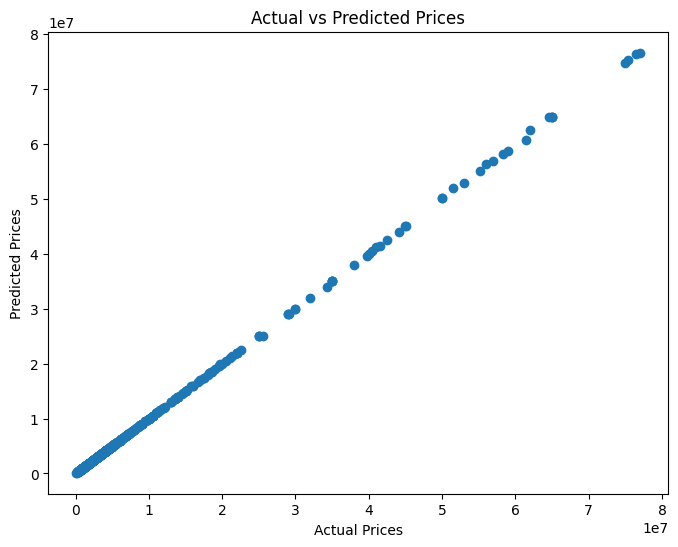

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Cross-validation
cv_scores = cross_val_score(pipeline, x, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE: {-cv_scores.mean()}")

# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()